In [1]:
import gensim
from gensim.models.callbacks import CallbackAny2Vec
import csv
import numpy as np
%matplotlib inline
import pandas as pd
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool, CustomJS
from bokeh.plotting import figure, show, output_notebook
from bokeh.embed import components, file_html
from bokeh.resources import CDN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
class logger(CallbackAny2Vec):
    None
    
embedding_model = gensim.models.Word2Vec.load('word2vec.model')
print(embedding_model)
embedding = embedding_model.wv.syn0

Word2Vec(vocab=452130, size=100, alpha=0.025)


/home/teticio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [3]:
print('Read in tracks...')
tracks = {}
with open('popular_tracks.csv', "r", encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        columns = str(row)[2:-2].split(';')
        tracks[columns[0]] = [columns[1] + ' - ' +
                              columns[2], columns[3]] # title - artist, url
print(f'Number of tracks: {len(tracks)}')

Read in tracks...
Number of tracks: 452130


In [4]:
mp3tovecs = pickle.load(open('../spotifytovec.p', 'rb'))
w2c = []
for item in mp3tovecs:
    if item in tracks and tracks[item][1] != '':
        w2c.append((item, tracks[item][0], tracks[item][1], embedding_model.wv.vocab[item].count))
w2c = sorted(w2c, key=lambda x: x[3], reverse=True)
len(w2c)

320949

In [28]:
track_names = dict([(i, (_[1], _[2])) for i, _ in enumerate(w2c)])
vectors = np.concatenate([np.expand_dims(embedding[embedding_model.wv.vocab[_[0]].index], axis=0) for _ in w2c])

In [6]:
tooltips = """
    <audio class="preview">
        <source src="@url" type="audio/mp3">
    </audio>
    <div style="font-family: Calibri; font-size: 12px;">
        <span class="play" style="visibility: hidden;">▶️</span>@track
    </div>
"""
code = """
    function next_track(previews, plays, i) {
        if (i > 0) {
            plays[i-1].style.visibility = "hidden";
        }
        if (previews[i]) {
            previews[i].onended = function() {
                next_track(previews, plays, i+1);
            }
            plays[i].style.visibility = "visible";
            previews[i].play();
        }
    }
    next_track(document.getElementsByClassName("preview"), document.getElementsByClassName("play"), 0);
"""

def plot_tsne(embedding_matrix, index_to_word, num_words = None, title = 't-SNE', random_state=None, tsne_df=None):
    matrix = embedding_matrix
    if num_words is not None:
        matrix = matrix[:num_words,:]
    info = [index_to_word.get(_, ("<UNK>", "")) for _ in range(matrix.shape[0])]
    tracks = [_[0] for _ in info]
    urls = [_[1] for _ in info]
    
    # defining the chart
    output_notebook()
    fig = bp.figure(output_backend="webgl", sizing_mode='stretch_both', title=title,
                    tools="pan,wheel_zoom,box_zoom,reset,hover",
                    x_axis_type=None, y_axis_type=None)

    # dimensionality reduction. converting the vectors to 2d vectors
    tsne_model = TSNE(n_components=2, verbose=2, random_state=random_state)
    tsne_w2v = tsne_model.fit_transform(matrix)

    # putting everything in a dataframe
    tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
    tsne_df['track'] = tracks
    tsne_df['url'] = urls

    # plotting. the corresponding word appears when you hover on the data point.
    fig.scatter(x='x', y='y', source=tsne_df, line_alpha=0.5, fill_alpha=0.5)
    hover = fig.select(dict(type=HoverTool))
    hover.tooltips = tooltips
    hover.callback = CustomJS(args={}, code=code)
    return fig, tsne_df

In [29]:
fig, tsne_df = plot_tsne(vectors, track_names, random_state = 616906225, title = f'Track2Vec (creativity = 0) t-SNE projection from 100 dimensions into 2 of {len(track_names):,} Spotify tracks')

Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 320949 samples in 1.776s...
[t-SNE] Computed neighbors for 320949 samples in 16281.895s...
[t-SNE] Computed conditional probabilities for sample 1000 / 320949
[t-SNE] Computed conditional probabilities for sample 2000 / 320949
[t-SNE] Computed conditional probabilities for sample 3000 / 320949
[t-SNE] Computed conditional probabilities for sample 4000 / 320949
[t-SNE] Computed conditional probabilities for sample 5000 / 320949
[t-SNE] Computed conditional probabilities for sample 6000 / 320949
[t-SNE] Computed conditional probabilities for sample 7000 / 320949
[t-SNE] Computed conditional probabilities for sample 8000 / 320949
[t-SNE] Computed conditional probabilities for sample 9000 / 320949
[t-SNE] Computed conditional probabilities for sample 10000 / 320949
[t-SNE] Computed conditional probabilities for sample 11000 / 320949
[t-SNE] Computed conditional probabilities for sample 12000 / 320949
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 123000 / 320949
[t-SNE] Computed conditional probabilities for sample 124000 / 320949
[t-SNE] Computed conditional probabilities for sample 125000 / 320949
[t-SNE] Computed conditional probabilities for sample 126000 / 320949
[t-SNE] Computed conditional probabilities for sample 127000 / 320949
[t-SNE] Computed conditional probabilities for sample 128000 / 320949
[t-SNE] Computed conditional probabilities for sample 129000 / 320949
[t-SNE] Computed conditional probabilities for sample 130000 / 320949
[t-SNE] Computed conditional probabilities for sample 131000 / 320949
[t-SNE] Computed conditional probabilities for sample 132000 / 320949
[t-SNE] Computed conditional probabilities for sample 133000 / 320949
[t-SNE] Computed conditional probabilities for sample 134000 / 320949
[t-SNE] Computed conditional probabilities for sample 135000 / 320949
[t-SNE] Computed conditional probabilities for sample 136000 / 320949
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 243000 / 320949
[t-SNE] Computed conditional probabilities for sample 244000 / 320949
[t-SNE] Computed conditional probabilities for sample 245000 / 320949
[t-SNE] Computed conditional probabilities for sample 246000 / 320949
[t-SNE] Computed conditional probabilities for sample 247000 / 320949
[t-SNE] Computed conditional probabilities for sample 248000 / 320949
[t-SNE] Computed conditional probabilities for sample 249000 / 320949
[t-SNE] Computed conditional probabilities for sample 250000 / 320949
[t-SNE] Computed conditional probabilities for sample 251000 / 320949
[t-SNE] Computed conditional probabilities for sample 252000 / 320949
[t-SNE] Computed conditional probabilities for sample 253000 / 320949
[t-SNE] Computed conditional probabilities for sample 254000 / 320949
[t-SNE] Computed conditional probabilities for sample 255000 / 320949
[t-SNE] Computed conditional probabilities for sample 256000 / 320949
[t-SNE] Computed con

In [8]:
show(fig)

In [30]:
script, div = components(fig)

In [31]:
html = """
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <title>Track2Vec t-SNE</title>
        <script src="https://cdn.bokeh.org/bokeh/release/bokeh-1.4.0.min.js"></script>
        <script src="https://cdn.bokeh.org/bokeh/release/bokeh-widgets-1.4.0.min.js"></script>
        <script src="https://cdn.bokeh.org/bokeh/release/bokeh-tables-1.4.0.min.js"></script>
""" + script + """
    </head>
    <body>
""" + div + """
    </body>
</html>
"""

In [32]:
with open('tracktovec.html', 'wt') as file:
    file.write(html)

In [ ]:
img = mpimg.imread('spectrograms/train/000JCyEkMFumqCZQJAORiQ.png')

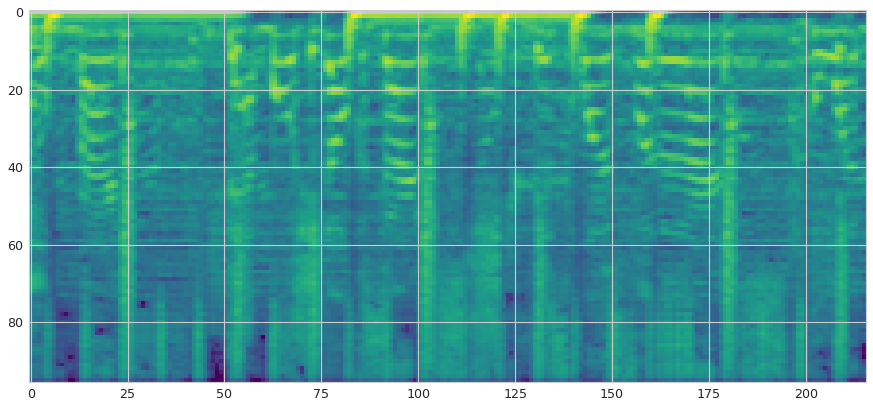

In [14]:
plt.figure(figsize = (15, 30))
plt.imshow(img)

In [14]:
track_names = dict([(i, (_[1], _[2])) for i, _ in enumerate(w2c)])
vectors = np.concatenate([np.expand_dims(mp3tovecs[_[0]], axis=0) for _ in w2c])

In [15]:
fig, tsne_df = plot_tsne(vectors, track_names, random_state = 615906225, title = f'Mp3ToVec (creativity = 1) t-SNE projection from 100 dimensions into 2 of {len(track_names):,} Spotify tracks')

Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 320949 samples in 1.814s...
[t-SNE] Computed neighbors for 320949 samples in 2941.657s...
[t-SNE] Computed conditional probabilities for sample 1000 / 320949
[t-SNE] Computed conditional probabilities for sample 2000 / 320949
[t-SNE] Computed conditional probabilities for sample 3000 / 320949
[t-SNE] Computed conditional probabilities for sample 4000 / 320949
[t-SNE] Computed conditional probabilities for sample 5000 / 320949
[t-SNE] Computed conditional probabilities for sample 6000 / 320949
[t-SNE] Computed conditional probabilities for sample 7000 / 320949
[t-SNE] Computed conditional probabilities for sample 8000 / 320949
[t-SNE] Computed conditional probabilities for sample 9000 / 320949
[t-SNE] Computed conditional probabilities for sample 10000 / 320949
[t-SNE] Computed conditional probabilities for sample 11000 / 320949
[t-SNE] Computed conditional probabilities for sample 12000 / 320949
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 134000 / 320949
[t-SNE] Computed conditional probabilities for sample 135000 / 320949
[t-SNE] Computed conditional probabilities for sample 136000 / 320949
[t-SNE] Computed conditional probabilities for sample 137000 / 320949
[t-SNE] Computed conditional probabilities for sample 138000 / 320949
[t-SNE] Computed conditional probabilities for sample 139000 / 320949
[t-SNE] Computed conditional probabilities for sample 140000 / 320949
[t-SNE] Computed conditional probabilities for sample 141000 / 320949
[t-SNE] Computed conditional probabilities for sample 142000 / 320949
[t-SNE] Computed conditional probabilities for sample 143000 / 320949
[t-SNE] Computed conditional probabilities for sample 144000 / 320949
[t-SNE] Computed conditional probabilities for sample 145000 / 320949
[t-SNE] Computed conditional probabilities for sample 146000 / 320949
[t-SNE] Computed conditional probabilities for sample 147000 / 320949
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 264000 / 320949
[t-SNE] Computed conditional probabilities for sample 265000 / 320949
[t-SNE] Computed conditional probabilities for sample 266000 / 320949
[t-SNE] Computed conditional probabilities for sample 267000 / 320949
[t-SNE] Computed conditional probabilities for sample 268000 / 320949
[t-SNE] Computed conditional probabilities for sample 269000 / 320949
[t-SNE] Computed conditional probabilities for sample 270000 / 320949
[t-SNE] Computed conditional probabilities for sample 271000 / 320949
[t-SNE] Computed conditional probabilities for sample 272000 / 320949
[t-SNE] Computed conditional probabilities for sample 273000 / 320949
[t-SNE] Computed conditional probabilities for sample 274000 / 320949
[t-SNE] Computed conditional probabilities for sample 275000 / 320949
[t-SNE] Computed conditional probabilities for sample 276000 / 320949
[t-SNE] Computed conditional probabilities for sample 277000 / 320949
[t-SNE] Computed con

In [22]:
#show(fig)
script, div = components(fig)

In [23]:
html = """
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <title>Mp3ToVec t-SNE</title>
        <script src="https://cdn.bokeh.org/bokeh/release/bokeh-1.4.0.min.js"></script>
        <script src="https://cdn.bokeh.org/bokeh/release/bokeh-widgets-1.4.0.min.js"></script>
        <script src="https://cdn.bokeh.org/bokeh/release/bokeh-tables-1.4.0.min.js"></script>
""" + script + """
    </head>
    <body>
""" + div + """
    </body>
</html>
"""

In [24]:
with open('mp3tovec.html', 'wt') as file:
    file.write(html)

In [25]:
tsne_df.head()

,x,y,track,url
0,-16.447363,-11.248156,XXXTENTACION - SAD!,https://p.scdn.co/mp3-preview/5b5a9c4dba2f360f...
1,3.420688,-17.585630,Post Malone - Better Now,https://p.scdn.co/mp3-preview/607d2a850975b41f...
2,-14.367495,-22.391979,Tyga - Taste (feat. Offset),https://p.scdn.co/mp3-preview/93d60b97736368a2...
3,-0.618206,-25.103191,XXXTENTACION - Jocelyn Flores,https://p.scdn.co/mp3-preview/9fd5ccc86f318c30...
4,16.719732,17.099169,XXXTENTACION - Moonlight,https://p.scdn.co/mp3-preview/91e4395aff0c73f0...


In [26]:
tsne_df.describe()

,x,y
count,320949.000000,320949.000000
mean,0.014532,0.037372
std,15.333205,15.633592
min,-35.816612,-33.836021
25%,-12.221579,-11.937753
50%,0.295595,-0.423036
75%,11.612016,11.949335
max,34.732643,35.437080


In [27]:
tsne_df[tsne_df['track'].str.contains('Monolink')]

,x,y,track,url
30156,-4.227654,-19.825525,Monolink - The End,https://p.scdn.co/mp3-preview/dd5ab8ba927e095d...
49313,-4.849422,-22.431459,Monolink - New Morning,https://p.scdn.co/mp3-preview/a5864f2fcf9c7a73...
62556,-4.591578,-21.863840,Monolink - Burning Sun - Radio Edit,https://p.scdn.co/mp3-preview/84761ff9856197bf...
67614,-6.450843,-19.522890,Monolink - Sirens,https://p.scdn.co/mp3-preview/cd3c55efdc642fe4...
76061,-3.994507,-23.044682,Monolink - Swallow - Tale Of Us Remix,https://p.scdn.co/mp3-preview/b6df8b23116e6808...
155077,-4.926986,-24.563253,Monolink - Sirens - Patrice Bäumel Remix,https://p.scdn.co/mp3-preview/e8f5f189928fe69d...
179099,-4.546000,-21.930794,Monolink - Burning Sun - Original,https://p.scdn.co/mp3-preview/0863c765e4126b64...
203557,-4.751231,-22.341562,Monolink - Black Day,https://p.scdn.co/mp3-preview/1691f52968ba4ada...
237815,-6.316751,-19.629179,Monolink - Sirens - Extended Version,https://p.scdn.co/mp3-preview/3fc28b8dcda7ce9f...
248410,-6.278562,-24.806055,Monolink - Burning Sun - Be Svendsen Remix,https://p.scdn.co/mp3-preview/24aa2ea40749c989...
